## Introduction to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[]

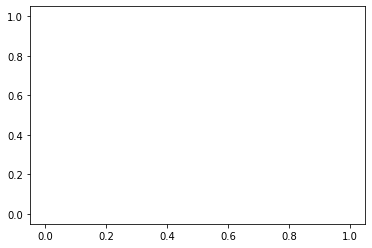

In [11]:
plt.plot()

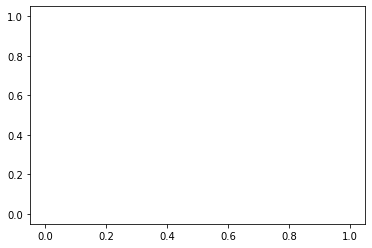

In [12]:
plt.plot(); #add ; to remove []

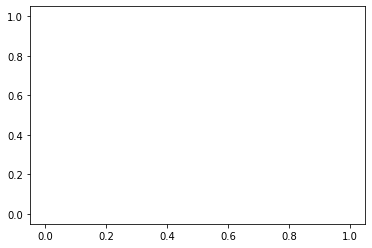

In [13]:
plt.plot()
plt.show()

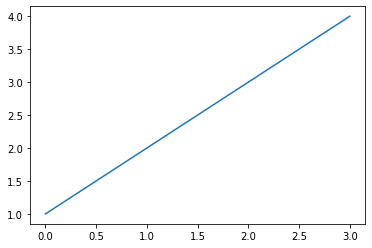

In [4]:
plt.plot([1, 2, 3, 4]) # assume x = [0, 1, 2, 3]

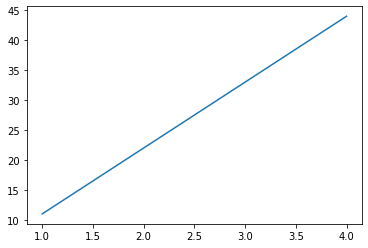

In [16]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y)

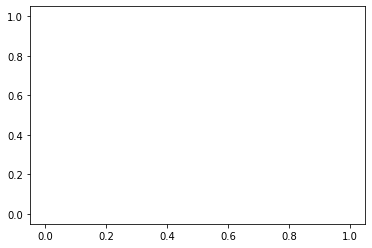

In [19]:
plt.plot();

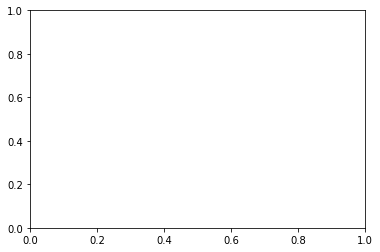

In [7]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

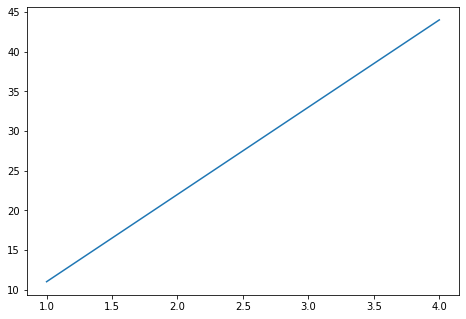

In [34]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y) # add some data
plt.show()

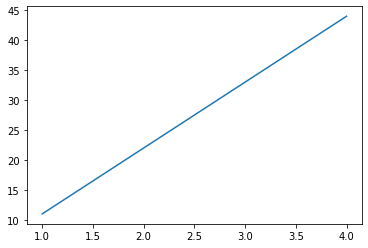

In [35]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, y); # add some data